# Group Project Machine Learning

Andrew Sukardi - 2540119601

Clarissa Octavia Tjandra - 2540120143

Grace Shirley Cam - 2501996505

# Import Library

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score

from imblearn.over_sampling import SMOTE

Import libraries yang akan dipakai.

# Upload File CSV

In [4]:
HeartData = pd.read_csv("heart_2020_cleaned.csv")

Memasukan file csv heart disease dan memasukan kedalam HeartData

# EDA

In [5]:
row,column = HeartData.shape
print("Jumlah Baris ",row)
print("Jumlah Kolom ",column)

Jumlah Baris  319795
Jumlah Kolom  18


In [6]:
HeartData.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Tampilan dari 10 data pertama dataset heart_2020_cleaned.csv.

Tidak ada missing value yang terlihat di head row.

Target variabel adalah HeartDisease.

In [7]:
#Duplicate data
print(HeartData.shape)
print(HeartData[HeartData.duplicated()].shape)

(319795, 18)
(18078, 18)


Dataset terdiri dari 53005 baris data dan 18 variabel.

Terdapat 549 data duplicate.

In [8]:
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Tidak ada data yang hilang.

Datatype di dataset ini hanya ada 14 object dan 4 float64.

In [9]:
#Missing Value
print(HeartData.isnull().sum())
print(HeartData.shape)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
(319795, 18)


Tidak ada variabel yang kehilangan datanya.

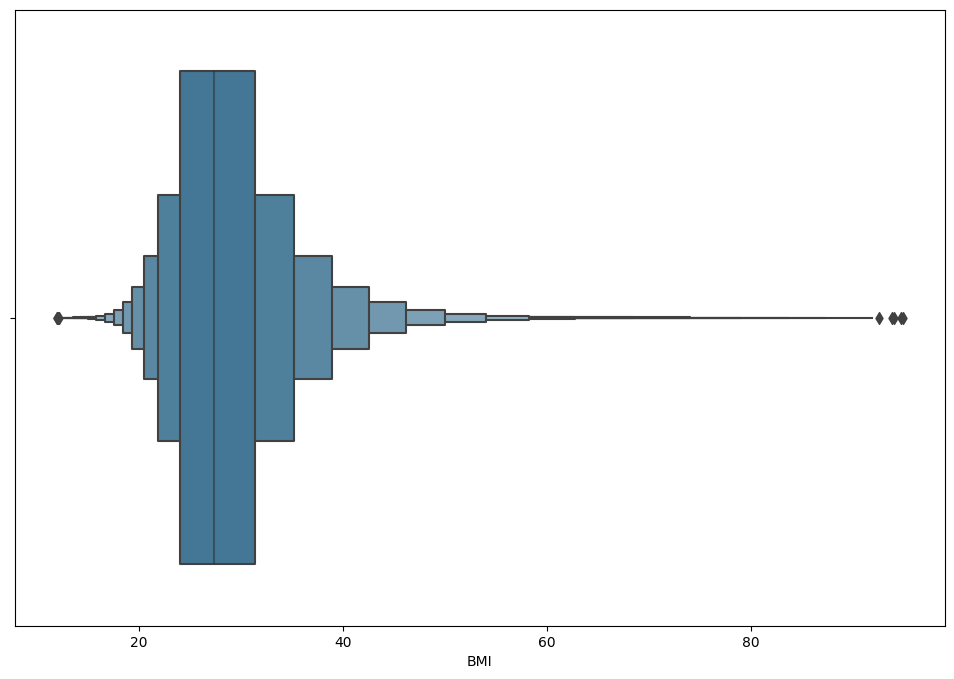

In [10]:
#Identifying Outliers in BMI
plt.figure(figsize=(12,8))
sns.boxenplot(x=HeartData.BMI, palette='mako')
plt.show()

Terdapat outliers di sebelah kiri (mendekati 10) dan kanan (mendekati 80..mendekati 90)boxplot.

<Axes: xlabel='BMI', ylabel='count'>

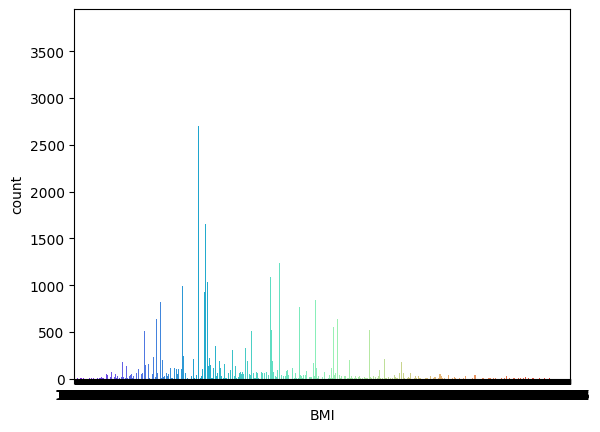

In [11]:
#BMI variable before binning
sns.countplot(x = 'BMI', data = HeartData, palette = "rainbow")

Sebaran BMI sebelum dikelompokkan.

Satu bar yang terlihat sangat tinggi hingga melebihi 600 merupakan jumlah pasien yang memiliki nilai BMI tersebut.



In [12]:
#Underweight = (BMI < 18.5), Normal Weight = (18.5 <= BMI < 25.0), Overweight = (25.0 <= BMI < 30.0), Obese =(30.0 <= BMI < 35.0), Extremely obese = (BMI >= 35.0)'
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
HeartData['BMICategory'] = pd.cut(HeartData['BMI'], bins, labels=names)

In [13]:
HeartData['BMICategory'].value_counts()

Overweight        114355
Normal weight      97778
Obese              61169
Extremly Obese     41379
Underweight         5114
Name: BMICategory, dtype: int64

Banyak pasien yang kelebihan berat badan.

<Axes: xlabel='BMICategory', ylabel='count'>

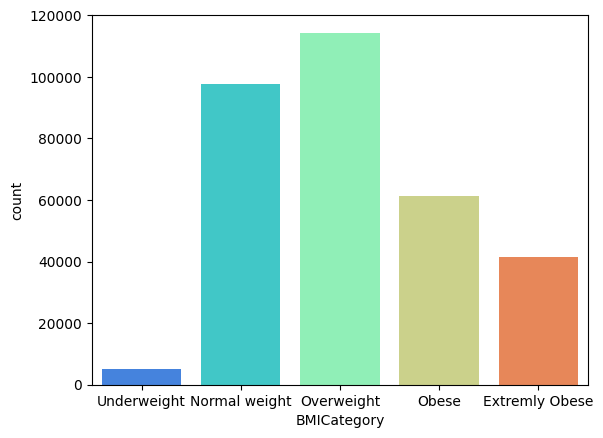

In [14]:
#BMI Variable after binning
sns.countplot(x = 'BMICategory', data = HeartData, palette = "rainbow")

Jumlah pasien yang kekurangan berat badan sangat sedikit dibanding pasien yang kelebihan berat badan.

In [15]:
HeartData.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Underweight
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal weight
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Overweight
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Normal weight
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Normal weight
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No,Overweight
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes,Normal weight
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No,Obese
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,Overweight
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,Extremly Obese


## EDA

Jika dilihat dari korelasi antar kolom dapat diketahui stroke dan susah jalan memiliki pengaruh yang tinggi akan heart disease.

Untuk korelasi tertinggi dengan 0.43 terdapat pada korelasi antara kolom kesehatan fisik dan susah jalan.

Selain itu korelasi ini memiliki korelasi antar kolom yang tidak tinggi.

<Axes: title={'center': 'HeartDisease Count'}, xlabel='HeartDisease', ylabel='count'>

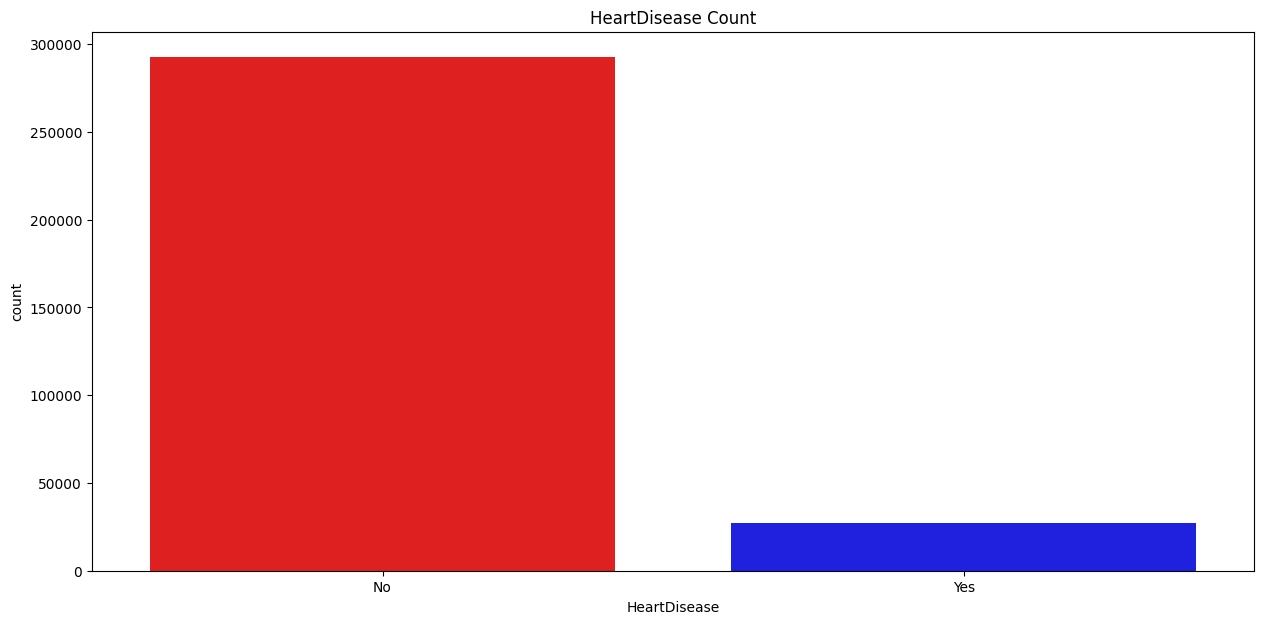

In [16]:
plt.figure(figsize=(15,7))
plt.title('HeartDisease Count')
color = ["red","blue"]
sns.set_palette(sns.color_palette(color))
sns.countplot(data=HeartData, x='HeartDisease', order=HeartData['HeartDisease'].value_counts().index)

Pada dataset ini memiliki ketimpangan yang sangat tinggi antara pasien yang memiliki penyakit jantung dan tidak.

Maka dari itu diperlukan function SMOTE untuk meratakan penyebaran.

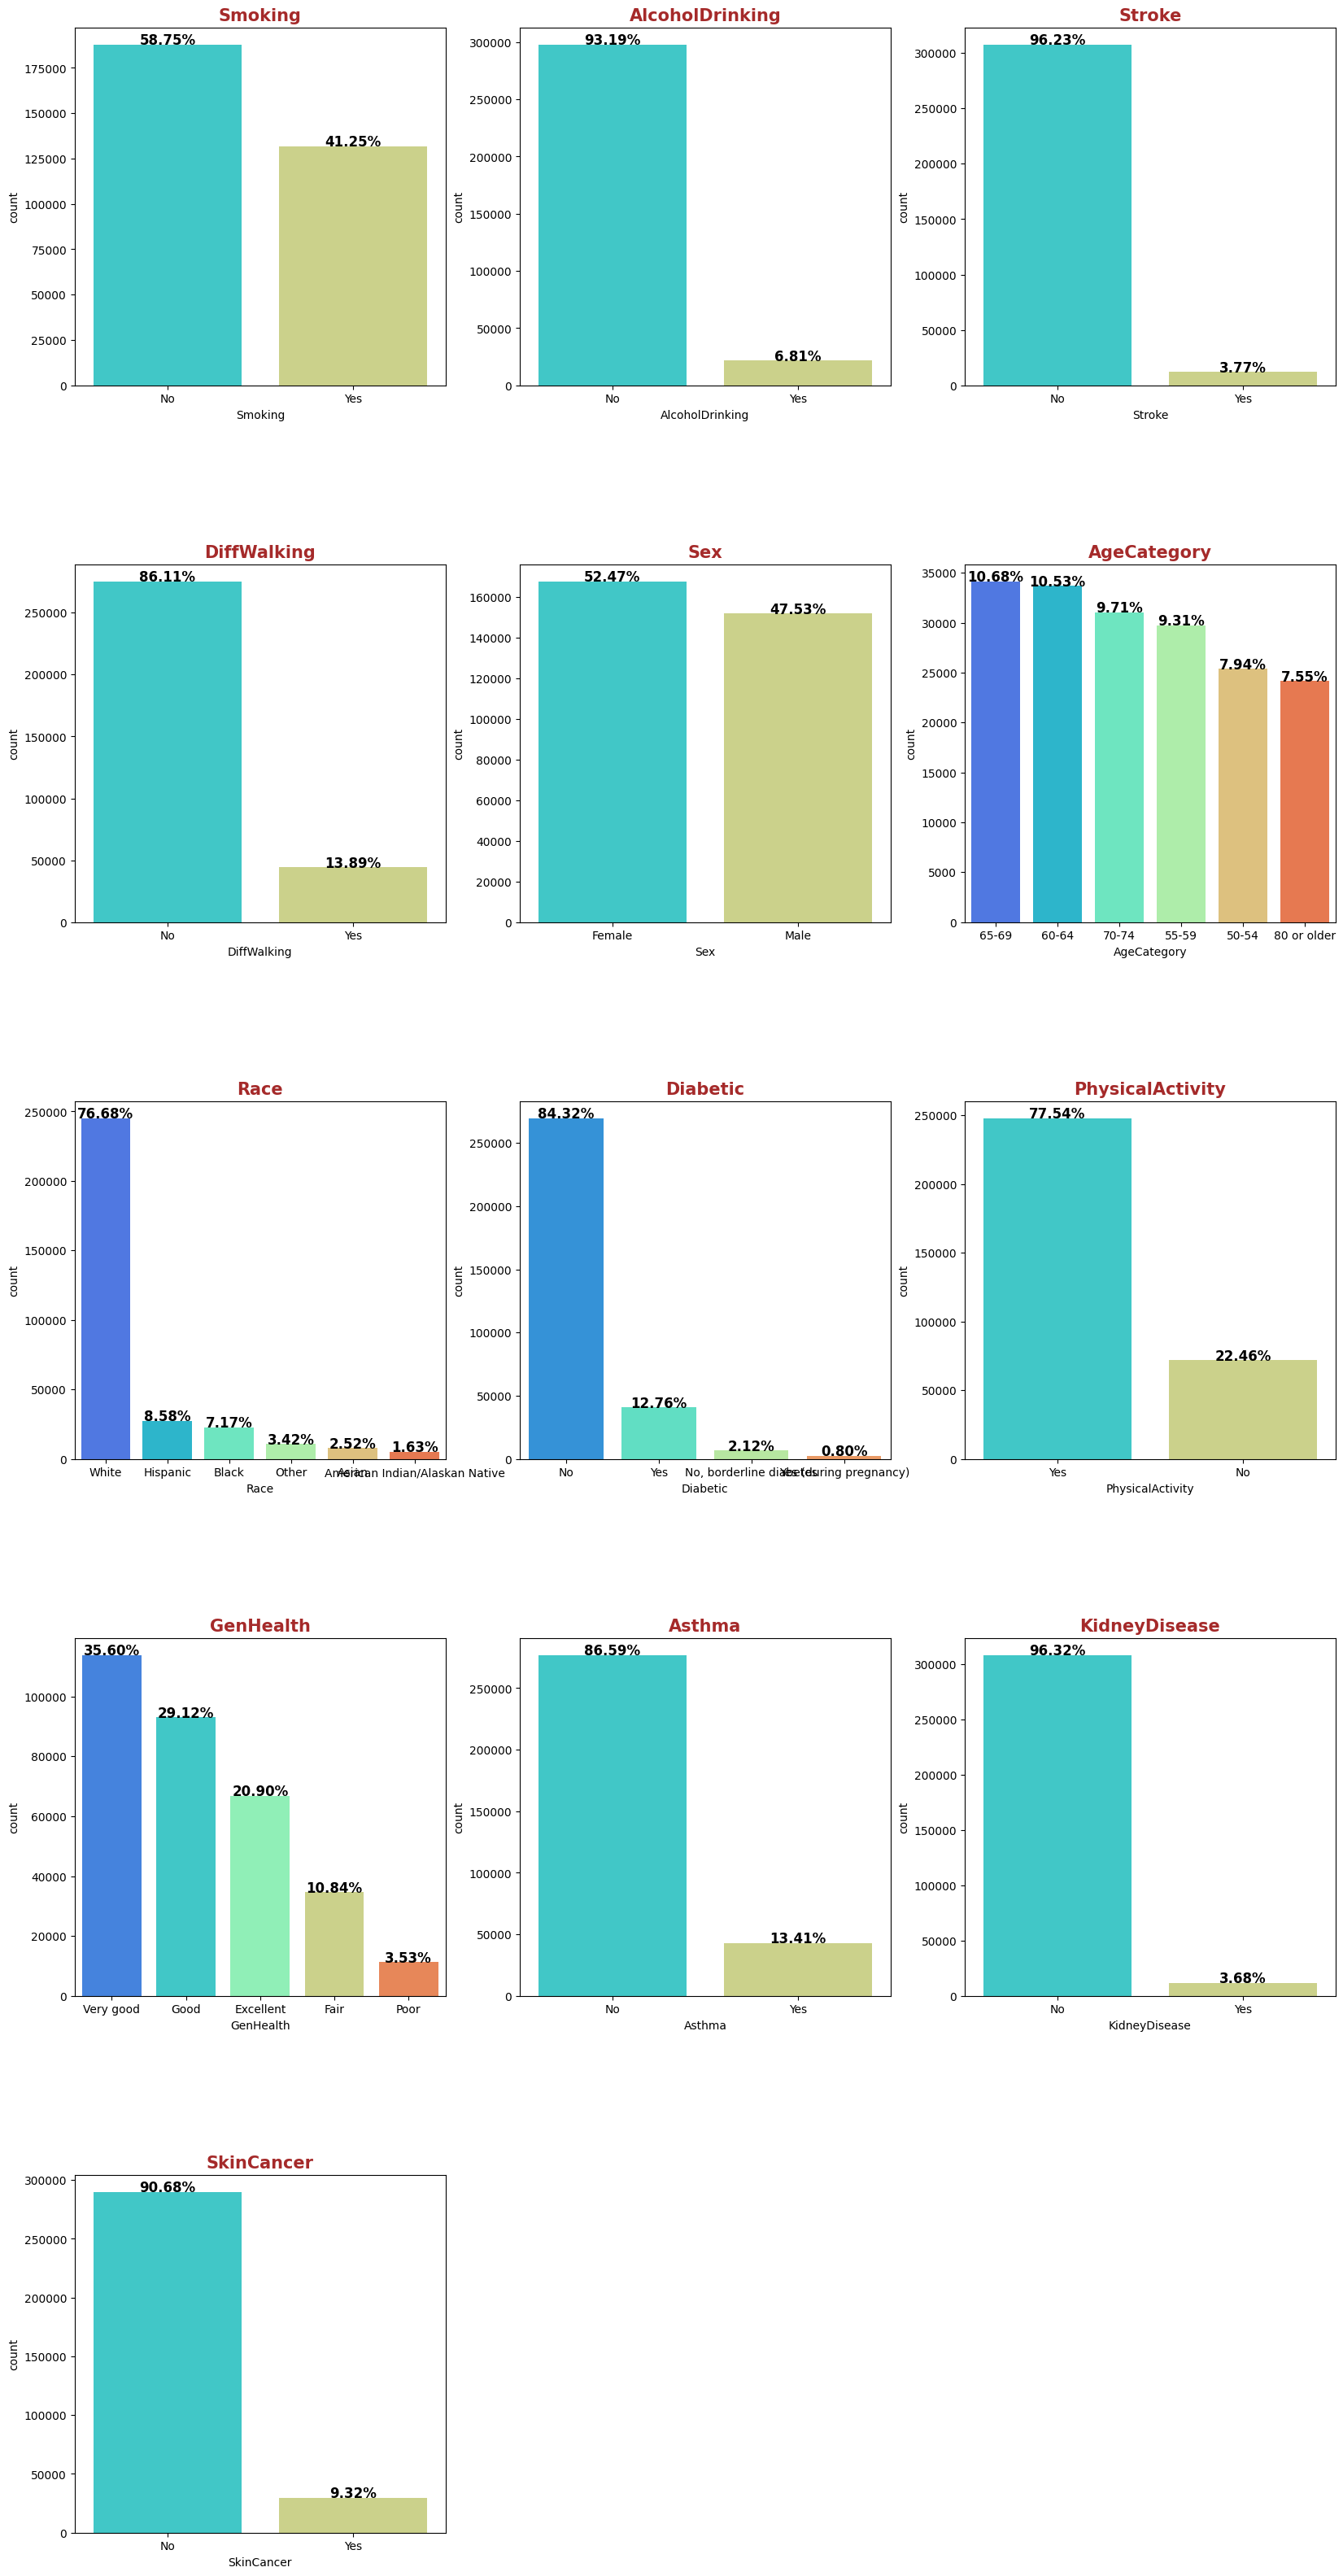

In [17]:
Column = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']
plt.figure(figsize=(20, 40))
for i in range(len(Column)):
  plt.subplot(5, 3, i+1)

  if(HeartData[Column[i]].nunique() < 3):
    ax = sns.countplot(data=HeartData, x=Column[i], palette='rainbow', order=HeartData[Column[i]].value_counts().index[:6])
  else:
    ax = sns.countplot(data=HeartData, x=Column[i], palette='rainbow', order=HeartData[Column[i]].value_counts().index[:6])


  plt.title(f'{Column[i]}', fontsize=15, fontweight='bold', color='brown')
  plt.subplots_adjust(hspace=0.5)

  for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    percent = height/len(HeartData)

    ax.text(x=p.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, ha='center', weight='bold')

Pada dateset ini orang yang memiliki penyakit liver sangatlah dikit begitu juga dengan stroke, asma, kanker kulit susah jalan, minum alkohol, dan diabetes.

Pada datasets ini kebanyakan orang berada di umur 65-69 tahun dan juga untuk keturunan paling banyak dapat terlihat pada kulit putih.

Untuk kesehatan gen di dataset yang teertingi pada luamyan baik, tapi tidak sepenuhnya baik.

Untuk jenis kelamin cukup stabil pada datasets ini.

In [18]:
x = HeartData.groupby('HeartDisease').GenHealth.value_counts(normalize=True).reset_index(name='Percentage')
x = x.sort_values(by='GenHealth', key=lambda x: x.map({'Excellent': 0,
                                                       'Very good': 1,
                                                       'Good': 2,
                                                       'Fair': 3,
                                                       'Poor': 4} ))

x.Percentage = round(x.Percentage * 100, 1)

fig = px.bar(data_frame=x, x='Percentage', y='HeartDisease', color='GenHealth',
       text=x.Percentage.map(lambda x: str(x) + '%'),
       color_discrete_sequence=['#1337f5', '#E80000', '#0f1e41', '#fd523e', '#404e5c', '#c9bbaa'])
fig.update_layout(title="What Individuals Say Their General Health Is", title_x=0.5)

fig.show()

Di sini dapat diperhatikan lebih jelas hubugan kesehatan gen dengan penyakit jantung.

Rata-rata orang yang memiliki kesehatan gen sangat baik jarang terkena penyakit jantung dengan perbandingan 5.3% dan 22.4% dan juga untuk yang cukup baik juga jarang terkena penyakit jantung dengan perbandingan 19% dan 36.8%.

Untuk orang-orang yang kesehatan gennya dibawah baik memiliki persentase terkena penyakit jantung besar.

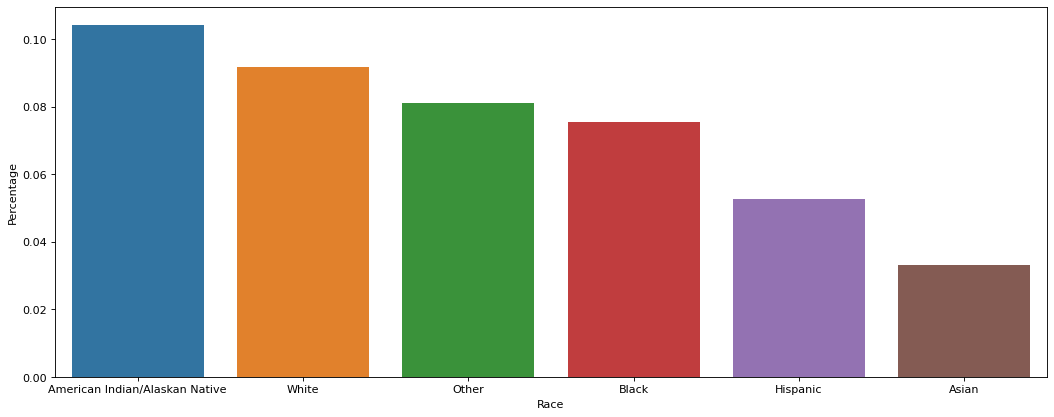

In [19]:
plt.figure(figsize=(16, 6), dpi=80)
x = HeartData.groupby('Race').HeartDisease.value_counts(normalize=True).reset_index(name='Percentage')
x = x.loc[x.HeartDisease == 'Yes'].sort_values('Percentage', ascending=False)

sns.barplot(data=x, x='Race', y='Percentage', palette="tab10");

Untuk keturunan dapat dilihat orang yang memiliki kuturanan amerika,putih,hitam, dan lainnya memiliki kemungkinan tinggi terkena penyakit jantung dengan persentase diatas 80%.

Sedangkan untuk keturunan hispanic dan asia memiliki kemungkunan yang lebih kecil, yaitu dibawah 50%.

In [20]:
def Relation(df,col, according_to, tipe='dis'):
  plt.figure(figsize=(16, 6), dpi=80);

  if tipe=='dis':
    sns.displot(data=df, x=col, hue=according_to, kind='kde', palette="Set1");
  elif tipe=='count':
    if according_to != None:
      perc = df.groupby(col)[according_to].value_counts(normalize=True).reset_index(name='Percentage')
      sns.barplot(data=perc, x=col,y='Percentage', hue=according_to,  palette="Set1", order=df[col].value_counts().index);
    else:
      sns.countplot(data=df, x=col, hue=according_to, palette=colors1, order=df[col].value_counts().index);

  if according_to==None:
    plt.title(f'{col}');
  else:
    plt.title(f'{col} according to {according_to}');

Membuat function untuk menghungkan suatu kolom dengan kolom penyakit jantung.

<Figure size 1280x480 with 0 Axes>

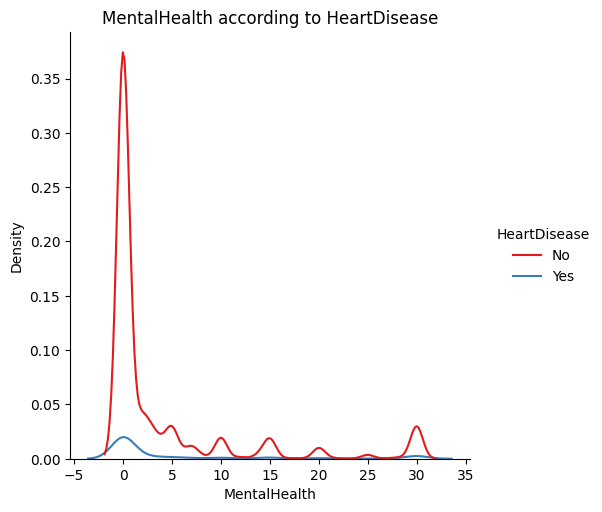

In [21]:
Relation(HeartData,'MentalHealth', 'HeartDisease')

Dilihat dari kolom diatas kesehatan mental di 0 memiliki kemungkinan besar dikedua penyakit jantung. Hal ini dapat dilihat dari lonjakan data dikedua datanya.

Untuk kesahatan mental 5, 10,15,dan 30 memiliki kemungkinan tidak terkena penyakit jantung.

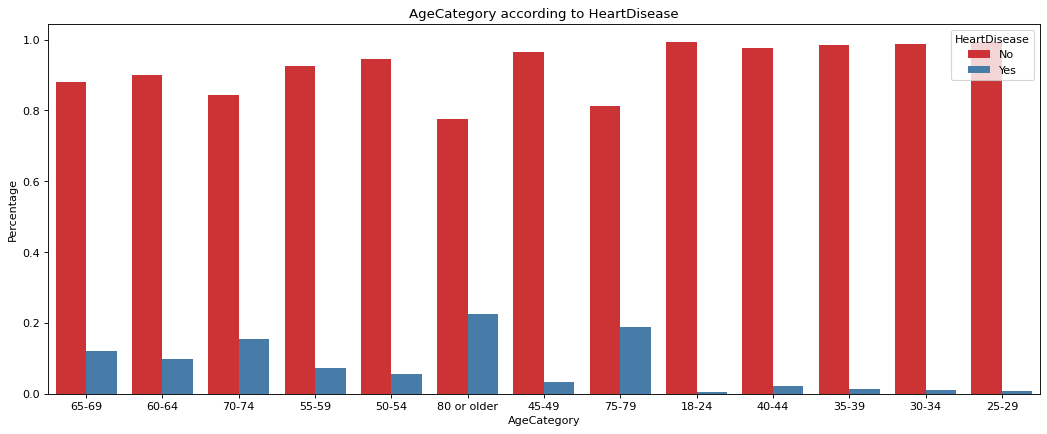

In [22]:
Relation(HeartData,'AgeCategory', 'HeartDisease',tipe='count')

Jika dilihat dari yang terkena penyakit jantung paling banyak rata-rata 65 tahun keatas.

Sedangkan untuk usia 35 tahun kebawah memiliki mengkinan kecil terkena penyakit jantung.

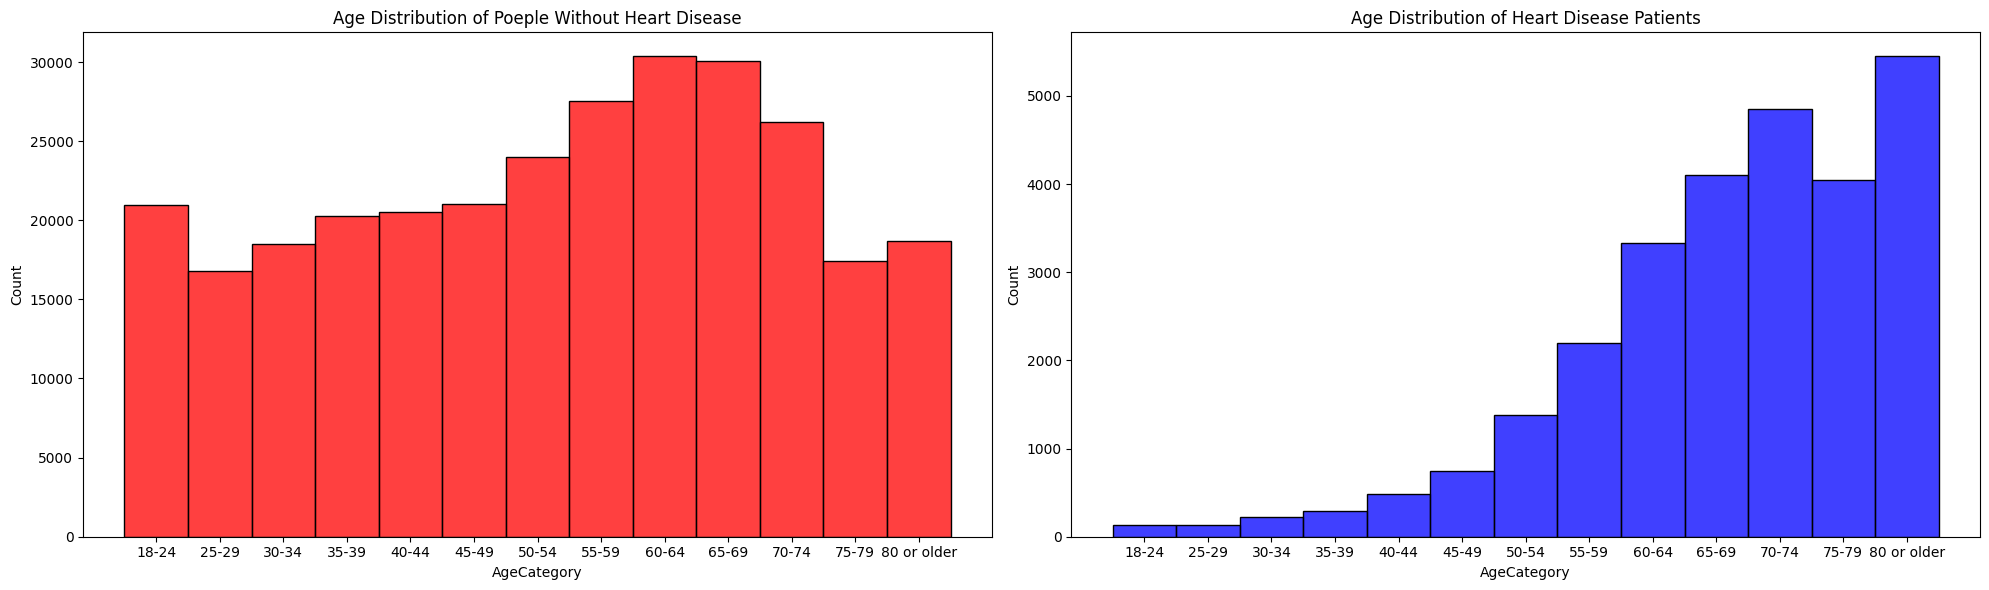

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

sns.histplot(data=HeartData.loc[HeartData.HeartDisease == 'No'].sort_values("AgeCategory"), x='AgeCategory',
                 color="Red", ax=ax1);
ax1.set_title("Age Distribution of Poeple Without Heart Disease")

sns.histplot(data=HeartData.loc[HeartData.HeartDisease == 'Yes'].sort_values("AgeCategory"), x='AgeCategory',
                  color="Blue", ax=ax2);
ax2.set_title("Age Distribution of Heart Disease Patients")


fig.tight_layout()

Untuk lebih jelasnya dapat dilihat dari grafik kanan dimana penyebaran memiliki tren yang naik, sehingga usianya pasien makin tinggi memiliki kemungkinan terkena penyakit jantung.

In [24]:
def line(df,issue):
    fig, ax = plt.subplots(figsize = (14,6))
    sns.kdeplot(df[df["HeartDisease"]=='Yes'][issue], alpha=1,shade = False, color="Red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df["KidneyDisease"]=='Yes'][issue], alpha=1,shade = False, color="Blue", label="KidneyDisease", ax = ax)
    sns.kdeplot(df[df["SkinCancer"]=='Yes'][issue], alpha=1,shade = False, color="Green", label="SkinCancer", ax = ax)
    sns.kdeplot(df[df["Asthma"]=='Yes'][issue], alpha=1,shade = False, color="Yellow", label="Asthma", ax = ax)
    sns.kdeplot(df[df["Stroke"]=='Yes'][issue], alpha=1,shade = False, color="Pink", label="Stroke", ax = ax)
    sns.kdeplot(df[df["Diabetic"]=='Yes'][issue], alpha=1,shade = False, color="Purple", label="Diabetic", ax = ax)

    ax.set_xlabel(issue)
    ax.set_ylabel("Frequency")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.show()

Function untuk membuat relasi dalam bentuk grafik garis yang menyatakan frekuensi dari suatu kolom dengan kolom penyakit jantung, penyakit liver, kanker kulit, asma, stroke, dan diabetes.

<ipython-input-24-9407fd37cbe1>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1

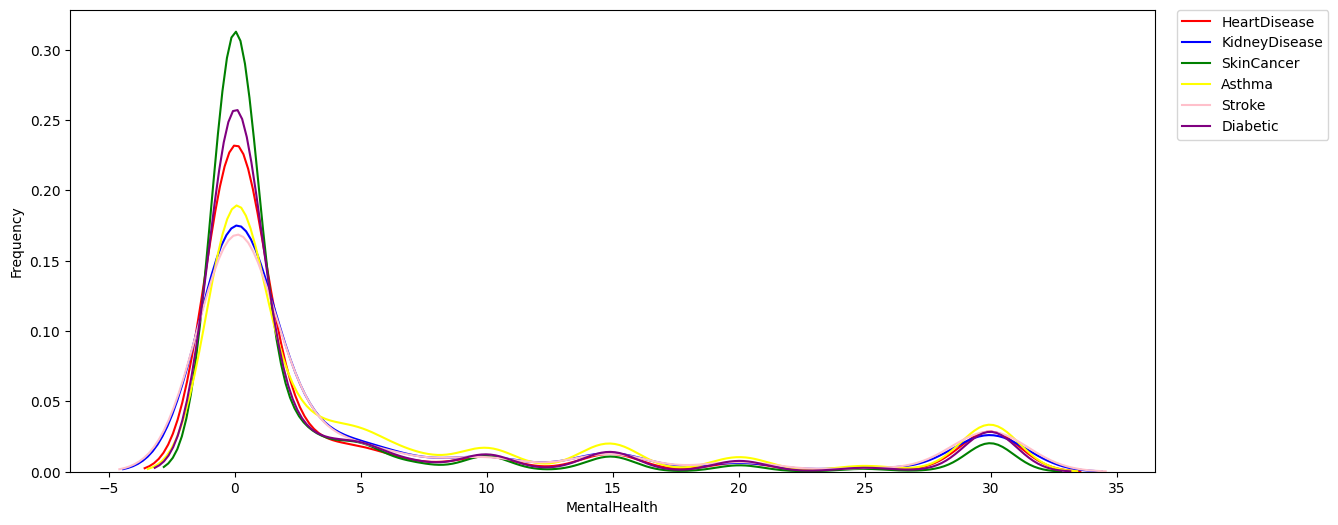

In [25]:
line(HeartData,'MentalHealth')

Jika dilihat dari frekuensi kesehatan mental orang di 0 memiliki kemungkinanan besar terkena penyakit jantung, penyakit liver, kanker kulit, asma, stroke, dan diabetes.

Kesehatan mental memiliki pengaruh besar terhadap kanker kulit.

<ipython-input-24-9407fd37cbe1>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1

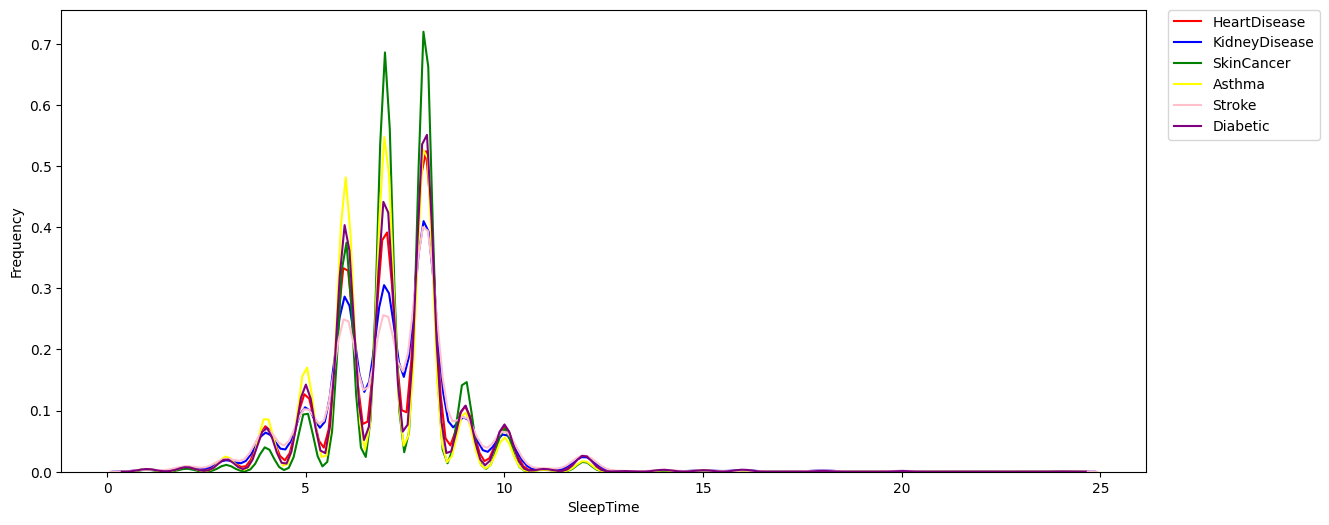

In [26]:
line(HeartData,'SleepTime')

untuk waktu tidur seseorang diantara 5-10 membentuk lonjakan yang tinggi dengan lonjakan yang tidak stabil baik turun.

<ipython-input-24-9407fd37cbe1>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-9407fd37cbe1

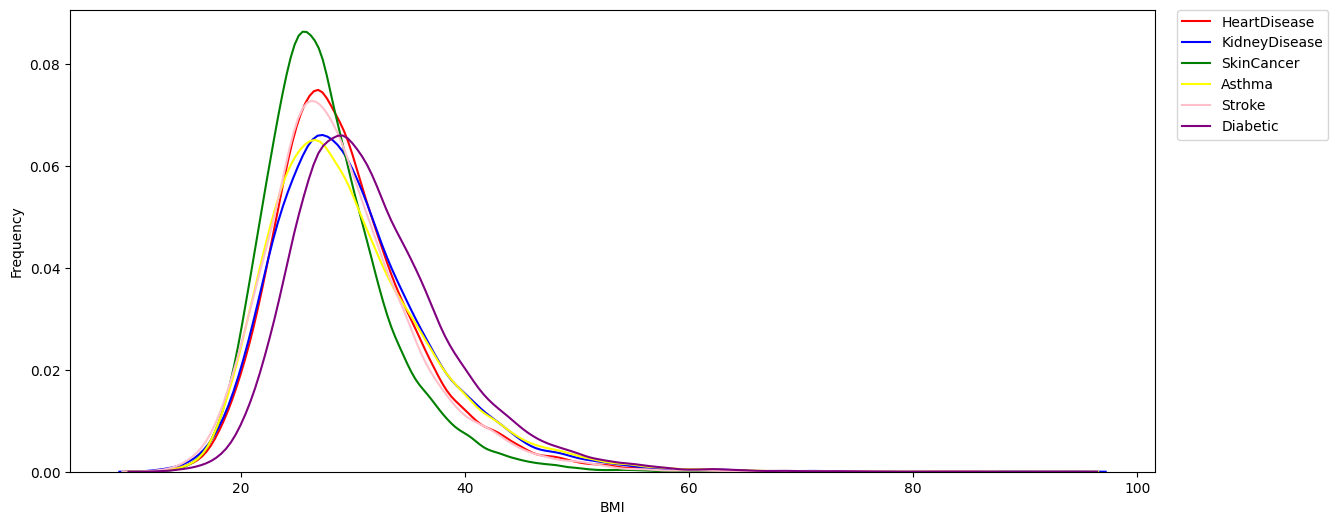

In [27]:
line(HeartData,'BMI')

Orang yang memiliki BMI diatara 10-60 memiliki kemungkinanan besar terkena penyakit jantung, penyakit liver, kanker kulit, asma, stroke, dan diabetes.

<ipython-input-28-2a1e7b3899d2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-28-2a1e7b3899d2>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



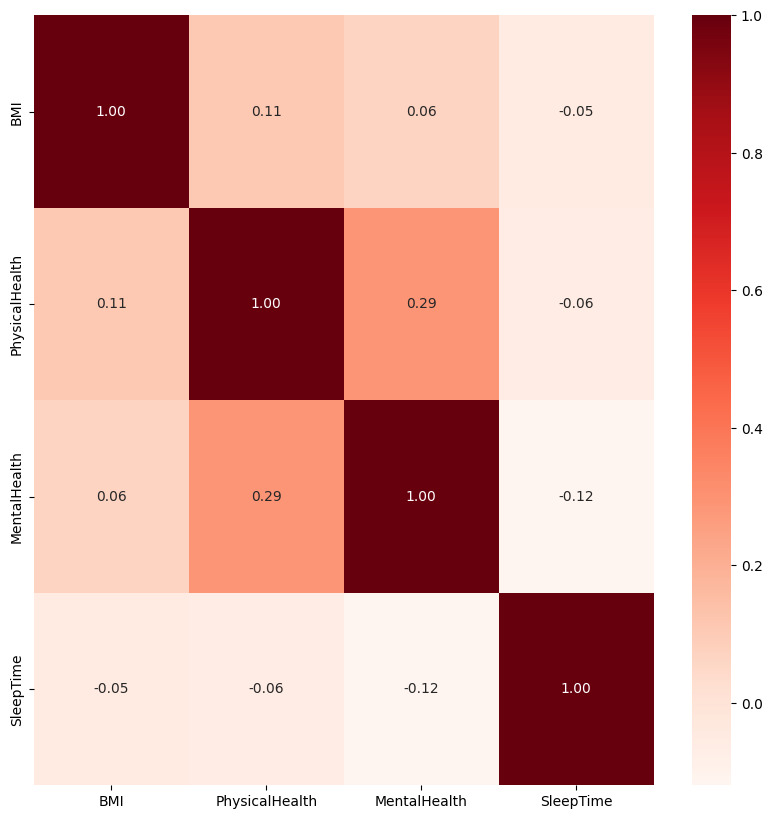

In [28]:
corr= HeartData.corr()

plt.figure(figsize=(10,10))
cor = HeartData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

Dapat dilihat dari korelasi antara kesehatan mental dan kesehatan fisik memiliki korelasi yang tinggi hanya untuk kolom numeric

Untuk membuat korelasi yang bersifat antara numeric dan kategori diperlukan membuat fungsi

In [29]:
df = HeartData
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

Fungsi diatas akan merubah kolom kategori dan object menjadi label encoder yang berbentuk angka 1,2,3 dan selebihnya.

Function ini akan dimasukan ke dapat dataframe baru.

<ipython-input-30-d8cc837d8c51>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-30-d8cc837d8c51>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



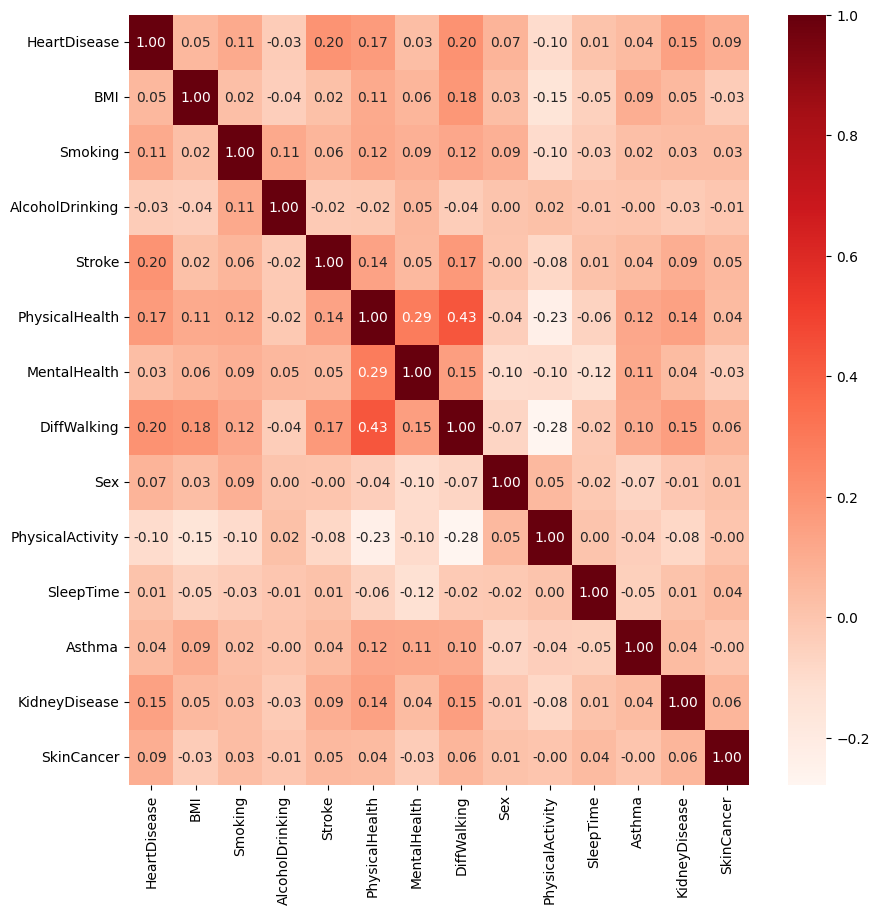

In [30]:
corr= df.corr()

plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

dari table korelasi diatas dapat dilihat bahwa smoking, stroke, physical health, diffwalking, physical activity dan kidney disease mempunyai korelasi yang tinggi dengan heart disease

### Data Processing

In [31]:
#Deleting Duplicate Data
HeartData = HeartData.drop_duplicates()
print(HeartData.shape)
print(HeartData[HeartData.duplicated()].shape)

(301717, 19)
(0, 19)


Menghapus kolom BMI, karena BMI sendiri sudah dipisahkan, menjadi kolom baru yang kategorikal yang mana kolom BMI menjadi tidak berguna dalam melakukan pemodelan

In [32]:
HeartData = HeartData.drop(['BMI'],axis=1)
HeartData.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
0,0,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,Underweight
1,0,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,Normal weight
2,0,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,Overweight
3,0,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,Normal weight
4,0,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,Normal weight


Selanjutnya adalah dengan menggunakan label encoder dan one hot encoder supaya model dapat membaca. Cara kerjanya adalah dengan membuat kolom baru dengan tanda 1 jika kolom itu ada dan 0 jika tidak. Sehingga datatypenya dari object dapat berubah menjadi integer.

In [33]:
order_cols = ["BMICategory", "AgeCategory", "HeartDisease"]
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    HeartData[col] = LabelEncoder().fit_transform(HeartData[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(HeartData[col], prefix=col)
    HeartData = pd.concat([HeartData, dummy_col], axis=1)
    del HeartData[col]


### Splitting the dataset

Membuat kolom X dan y. Dimana X itu sebagai isi dari semua kolom yang akan menentukan kolom target dan y adalah kolom target. Dalam kasus ini kolom target adalah HeartDisease.

In [34]:
X = HeartData.drop(['HeartDisease'],axis=1)
y = HeartData.HeartDisease

Karena pada awalnya HeartDisesase memberi penyebaran yang tidak rata maka dari itu diperlukan function SMOTE untuk meratakan penyebaran 'yes' dan 'no' menjadi sama rata, yaitu 50-50.

In [35]:
over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)

Selanjutnya adalah melakukan split data yang mana akan dibagi menjadi train dan test untuk pembagiannya adalah 20% test dan 80% train dan juga akan di shufle dalam pembagian train dan test. Hal ini dilakukan karena dataset yang digunakan kebanyakan kategori.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((439129, 38), (109783, 38), (439129,), (109783,))

### Fitting the dataset into model

Sebelum membuat model, membuat dataframe sementara yang akan menampung hasil dan akurasi dari setiap model.

In [37]:
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])

Model yang pertama dipilih adalah dengan munggunakan logistic regression yang mana menggunakan cara one versus rest dalam menangani multi class.

In [38]:
models= LogisticRegression(multi_class='ovr',solver='lbfgs',n_jobs=-1,random_state=42)

models.fit(x_train,y_train)
model = 'Logistic Regression'
train_score = round(models.score(x_train, y_train)*100,2)
test_score = round(models.score(x_test, y_test)*100,2)
recall = round(recall_score(y_test, models.predict(x_test))*100,2)
precision = round(precision_score(y_test, models.predict(x_test))*100,2)
f1 = round(f1_score(y_test, models.predict(x_test))*100,2)
results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

Model yang kedua dipilih adalah dengan munggunakan decison tree untuk menentukan klasifikasi.

In [39]:
models= DecisionTreeClassifier()
models.fit(x_train,y_train)
model = 'Decision Tree'
train_score = round(models.score(x_train, y_train)*100,2)
test_score = round(models.score(x_test, y_test)*100,2)
recall = round(recall_score(y_test, models.predict(x_test))*100,2)
precision = round(precision_score(y_test, models.predict(x_test))*100,2)
f1 = round(f1_score(y_test, models.predict(x_test))*100,2)
results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

Model yang ketiga adalah dengan menggunakan random forest sebagai model klasifikasi.

In [40]:
models = RandomForestClassifier(random_state = 42)
models.fit(x_train,y_train)
model = 'Random Forest'
train_score = round(models.score(x_train, y_train)*100,2)
test_score = round(models.score(x_test, y_test)*100,2)
recall = round(recall_score(y_test, models.predict(x_test))*100,2)
precision = round(precision_score(y_test, models.predict(x_test))*100,2)
f1 = round(f1_score(y_test, models.predict(x_test))*100,2)
results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

Model yang terakhir adalah suport vector machine sebagai model klasifikasi.

In [41]:
models = SVC(max_iter=500)
models.fit(x_train,y_train)
model = 'Support Vector Machine without Scaler'
train_score = round(models.score(x_train, y_train)*100,2)
test_score = round(models.score(x_test, y_test)*100,2)
recall = round(recall_score(y_test, models.predict(x_test))*100,2)
precision = round(precision_score(y_test, models.predict(x_test))*100,2)
f1 = round(f1_score(y_test, models.predict(x_test))*100,2)
results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



tapi SVM akan menghasil akurasi yang tidak tinggi jika tidak menggunakan sacler.  

Maka dari itu scaler yang digunakan adalah standard scaler.

In [42]:
models = Pipeline([('scaler', StandardScaler()), ('clf', SVC(max_iter=500))])
models.fit(x_train,y_train)
model = 'Support Vector Machine with Standard Scaler'
train_score = round(models.score(x_train, y_train)*100,2)
test_score = round(models.score(x_test, y_test)*100,2)
recall = round(recall_score(y_test, models.predict(x_test))*100,2)
precision = round(precision_score(y_test, models.predict(x_test))*100,2)
f1 = round(f1_score(y_test, models.predict(x_test))*100,2)
results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Selanjutnya akan memperlihatkan hasilnya dari akurasi setiap model dengan recal, precision, dan f1-score.

In [43]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,Logistic Regression,93.62,93.63,89.22,97.84,93.33
1,Decision Tree,98.59,92.18,91.30,92.93,92.11
2,Random Forest,98.59,94.15,91.10,97.01,93.96
3,Support Vector Machine without Scaler,44.87,44.91,70.37,46.63,56.09
4,Support Vector Machine with Standard Scaler,74.04,74.05,49.12,97.96,65.43


### conclusion

Kesimpulan yang didapatkan dari pemilihal model adakah dengan munggunakan random forest dalam kasus dataset ini memberikan akurasi yang tinggi pada training dan juga testing, yaitu 98,6% dan 92,3%. Sedangkan untuk model SVM tidak terlalu efektif dalam pemodelan ini. Hasilnya dibawah 70%, walaupun sudah diberikan scaler.